## Descriptive Statistics and Validation

v1_08.04.2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import zscore

In [56]:
from scipy import stats

### Descriptive Statistics

In [48]:
# Load the data
data = pd.read_csv('data_merged_all.csv')

In [5]:
# Basic Descriptive Statistics for all the variables
descriptive_stats = data.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
              ID        AGE        WORK  Gender_Männlich  Gender_Weiblich  \
count        30  30.000000   30.000000        30.000000        30.000000   
unique       30        NaN         NaN              NaN              NaN   
top     ABO2606        NaN         NaN              NaN              NaN   
freq          1        NaN         NaN              NaN              NaN   
mean        NaN  24.300000   41.666667         0.733333         0.266667   
std         NaN   5.577974   26.206518         0.449776         0.449776   
min         NaN  18.000000   10.000000         0.000000         0.000000   
25%         NaN  21.000000   20.000000         0.250000         0.000000   
50%         NaN  23.000000   40.000000         1.000000         0.000000   
75%         NaN  25.750000   60.000000         1.000000         0.750000   
max         NaN  47.000000  100.000000         1.000000         1.000000   

        Edu_Abitur_oder_Fachabitur  Edu_Bachelor  Edu_Master  

In [7]:
# Look at distribution of genders
gender_distribution = data[['Gender_Männlich', 'Gender_Weiblich']].sum()
print(gender_distribution)

Gender_Männlich    22
Gender_Weiblich     8
dtype: int64


In [8]:
# Look at distribution of education levels
education_levels = data[['Edu_Abitur_oder_Fachabitur', 'Edu_Bachelor', 'Edu_Master']].sum()
print(education_levels)

Edu_Abitur_oder_Fachabitur    10
Edu_Bachelor                  14
Edu_Master                     5
dtype: int64


In [15]:
# Look at distribution for the randomized groups 
group_order_distribution = data['Group_Nr'].value_counts()
print("\nNr - Cnt\n",group_order_distribution)


Nr - Cnt
 2    7
4    6
3    4
5    4
1    3
7    3
6    2
8    1
Name: Group_Nr, dtype: int64


In [18]:
# Look at distribution for the experimental conditions
experimental_distribution = data['Prompt_Support'].value_counts()
print("\nI - II\n",experimental_distribution)


I - II
 1    16
0    14
Name: Prompt_Support, dtype: int64


In [66]:
# Look at mean values for JC and SDT
jcsdt = data[['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']].mean()
print(jcsdt)

JC1[IStR]    3.515000
JC2[IStR]    3.560000
JC1[HRJD]    2.819444
JC2[HRJD]    4.136111
SDT1[AUT]    3.533333
SDT2[AUT]    3.266667
SDT1[COM]    3.533333
SDT2[COM]    4.233333
dtype: float64


In [22]:
# Look at mean values for the Big Five
big_five_distribution = data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']].mean()
print(big_five_distribution)

NEO[E]    3.100000
NEO[A]    3.225000
NEO[C]    3.650000
NEO[N]    2.783333
NEO[O]    3.793333
dtype: float64


In [23]:
# Calculate mean time for each 'Prompt_Support' group to see if there are big differences 
mean_time_with_support = data[data['Prompt_Support'] == 1]['time_total'].mean()
mean_time_without_support = data[data['Prompt_Support'] == 0]['time_total'].mean()
print(f"Mean Time with Prompt Support: {mean_time_with_support}")
print(f"Mean Time without Prompt Support: {mean_time_without_support}")

Mean Time with Prompt Support: 37.5991875001875
Mean Time without Prompt Support: 33.259535715


Text(0.5, 1.0, 'Work Distribution')

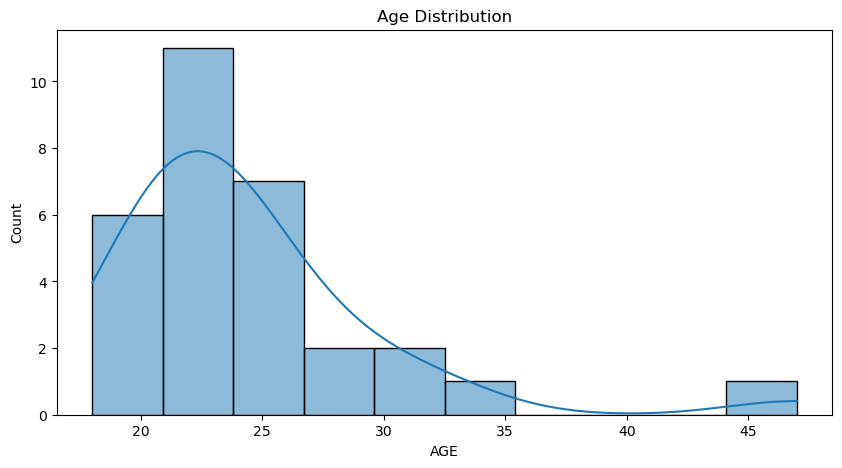

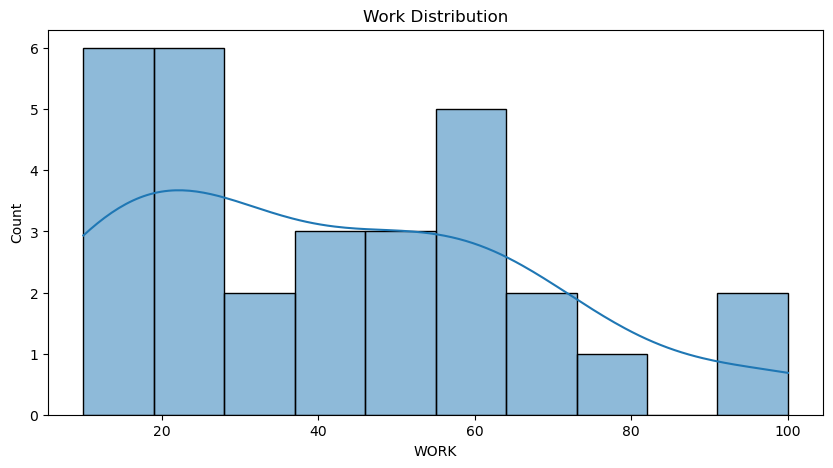

In [24]:
# Histograms for distribution of age and work
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], bins=10, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(10, 5))
sns.histplot(data['WORK'], bins=10, kde=True)
plt.title('Work Distribution')

Text(0.5, 1.0, 'Boxplot for JC and SDT')

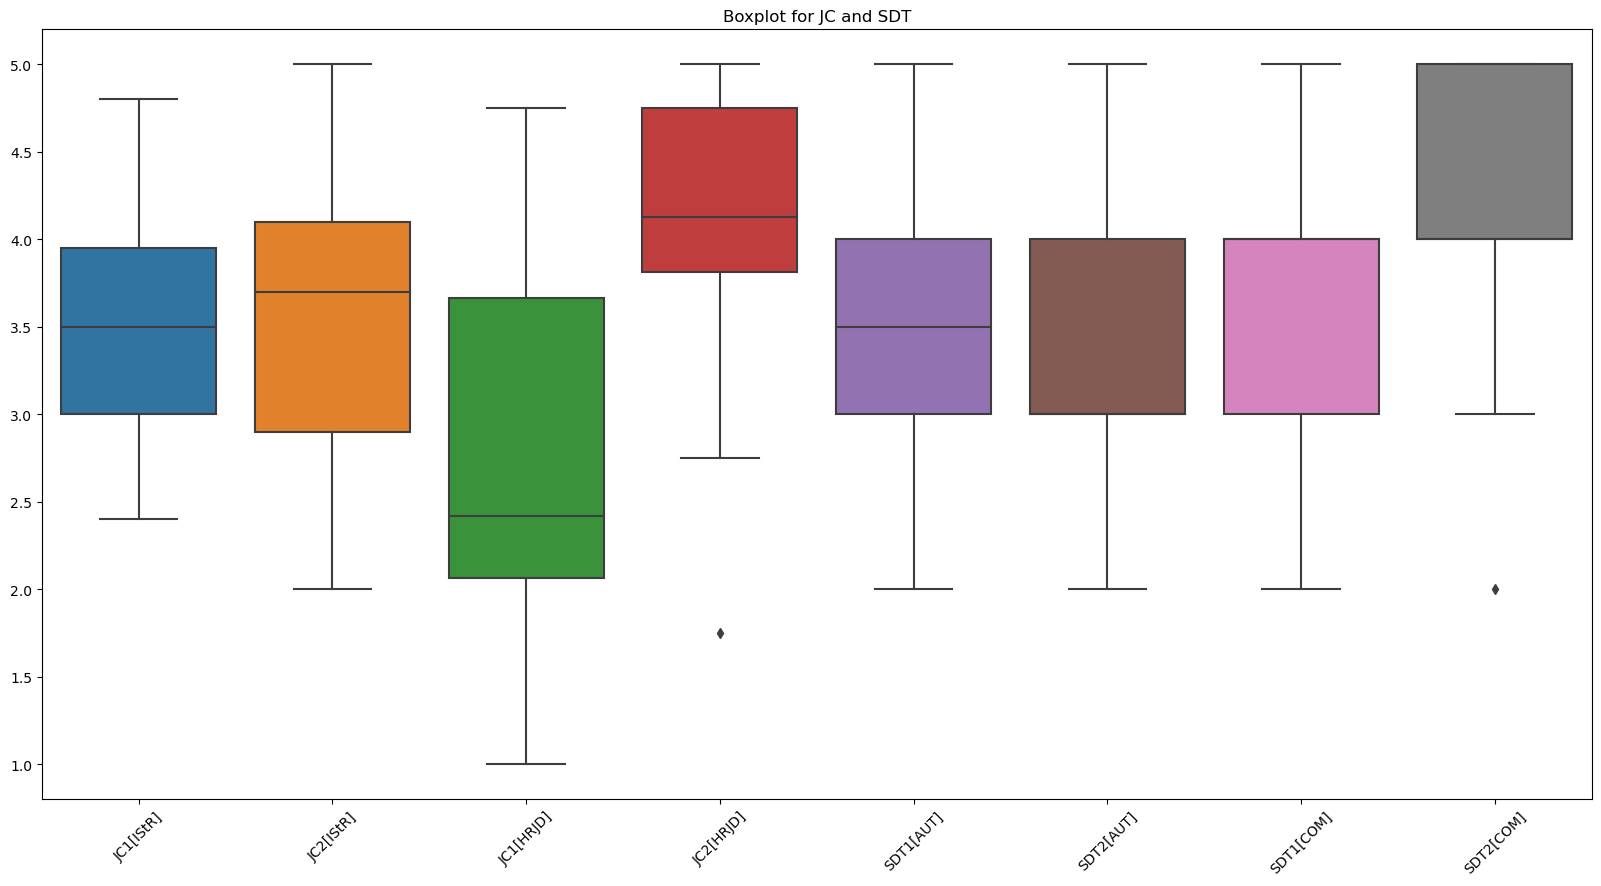

In [27]:
# Boxplots JC and SDT variables to graphically see differences
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']])
plt.xticks(rotation=45)
plt.title('Boxplot for JC and SDT')

In [26]:
## We can already see that there are not really differences between IStR and AUT but there are for HRJD and COM

Text(0.5, 1.0, 'Boxplot for PROD and DIF')

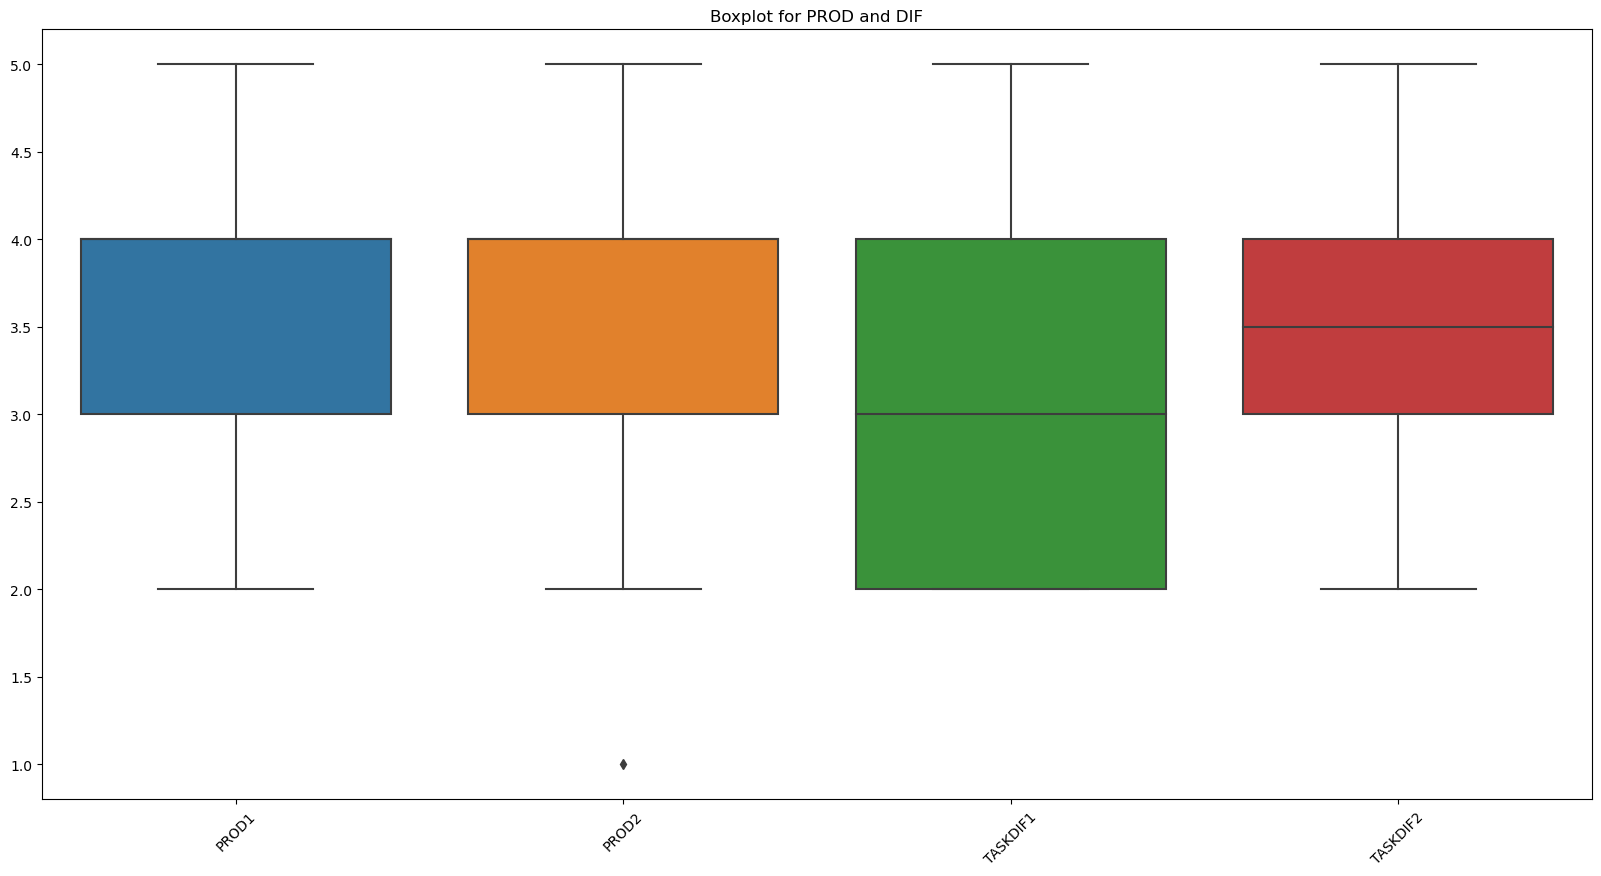

In [28]:
# Boxplots variables that could be used as controls
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['PROD1', 'PROD2', 'TASKDIF1', 'TASKDIF2']])
plt.xticks(rotation=45)
plt.title('Boxplot for PROD and DIF')

In [ ]:
## Productivity for control and experimental condition seems to be same. For task difficulty participants in control condition are more distributed
## It seems a bit strange that people in the experimental condition had a feeling that the task was more difficult
## CAREFUL: No claim about which task was more difficult but only about the conditions

Text(0.5, 1.0, 'Boxplot for SE')

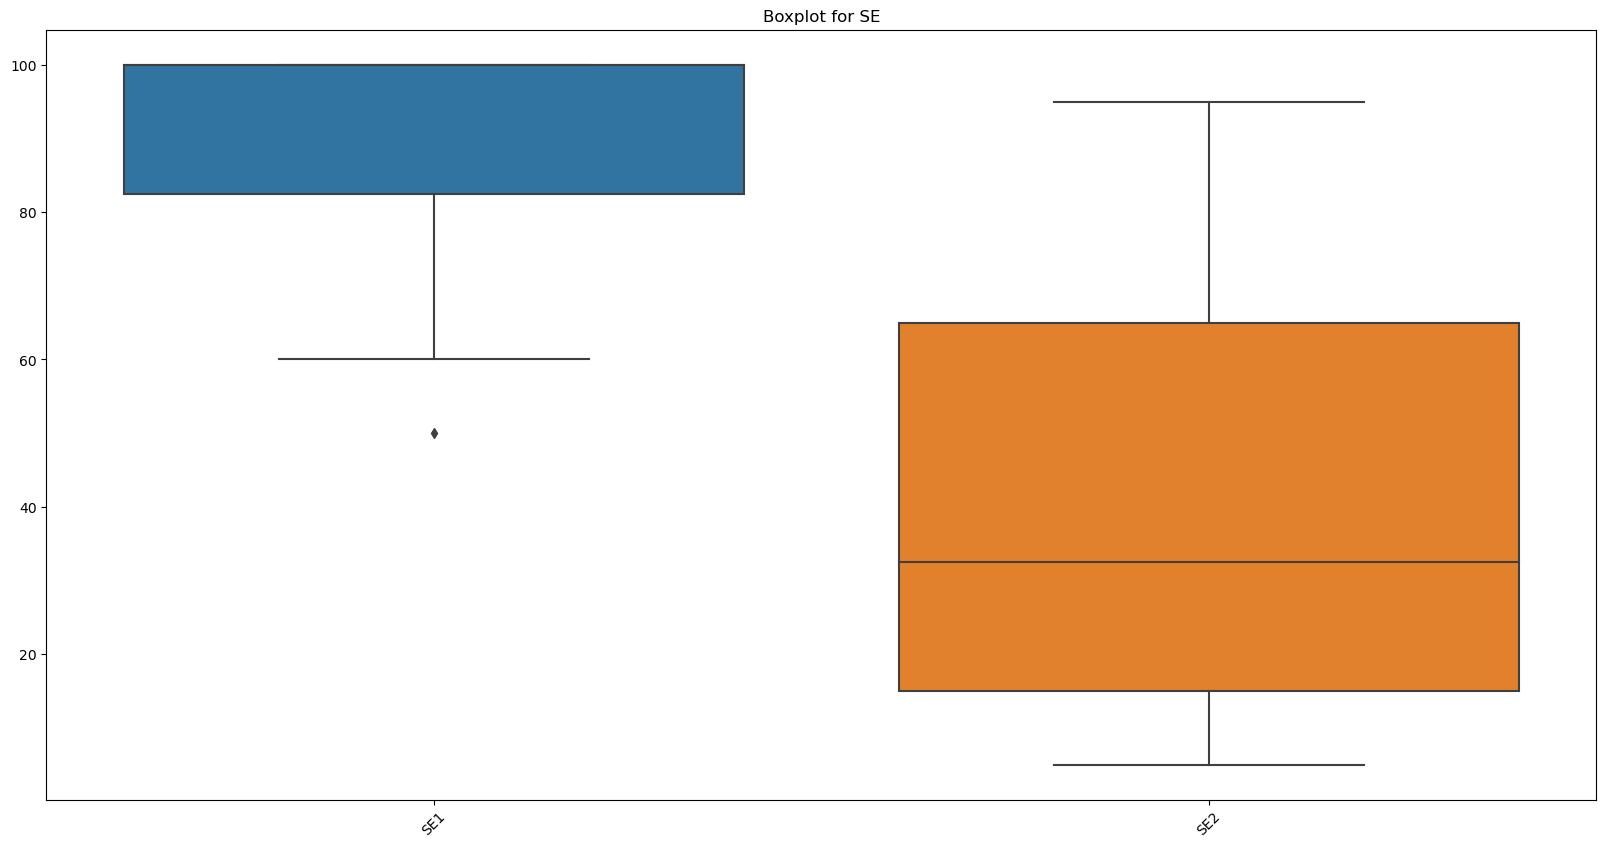

In [29]:
# Boxplots variables that could be used as controls (different boxplot because of metrics)
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['SE1', 'SE2']])
plt.xticks(rotation=45)
plt.title('Boxplot for SE')

In [ ]:
## Nothing surprising: People using GPT thought they had done less (no positive or negative statement)

Text(0.5, 1.0, 'Correlation Heatmap')

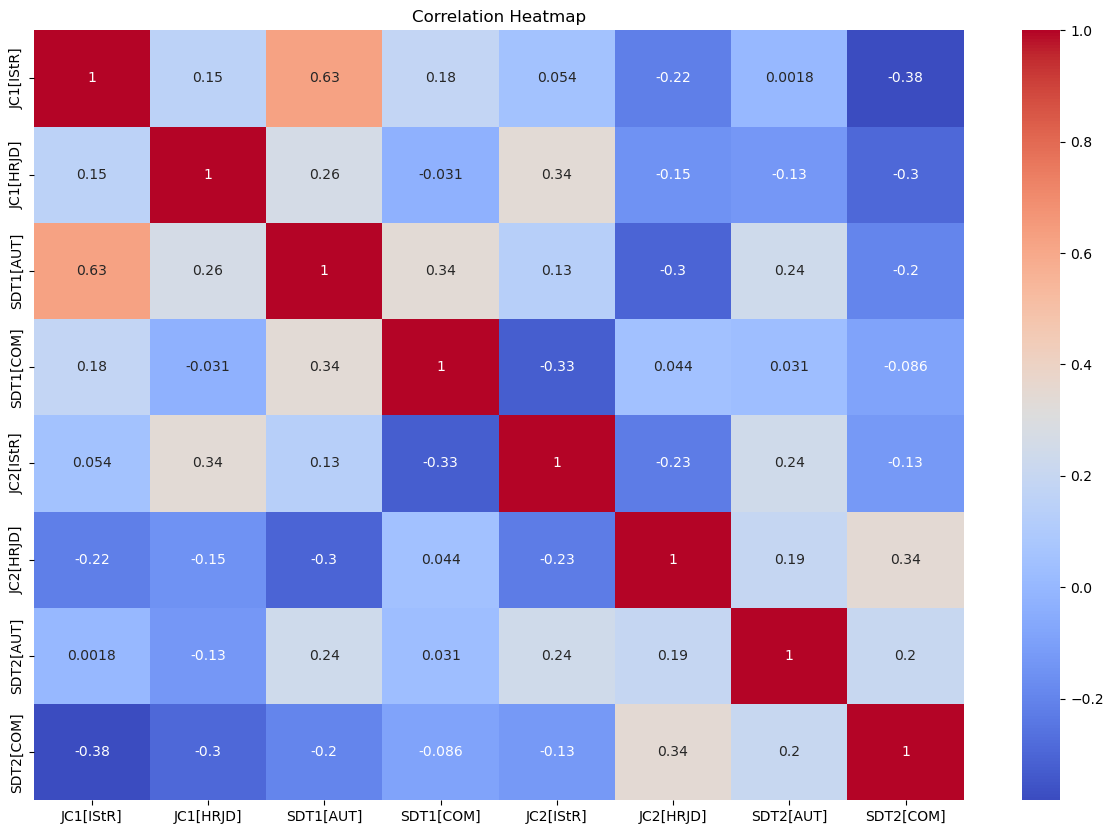

In [49]:
# Correlation Heatmap for JC and SDT
plt.figure(figsize=(15, 10))
correlation_matrix = data_plot1=data[['JC1[IStR]', 'JC1[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT2[AUT]', 'SDT2[COM]']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

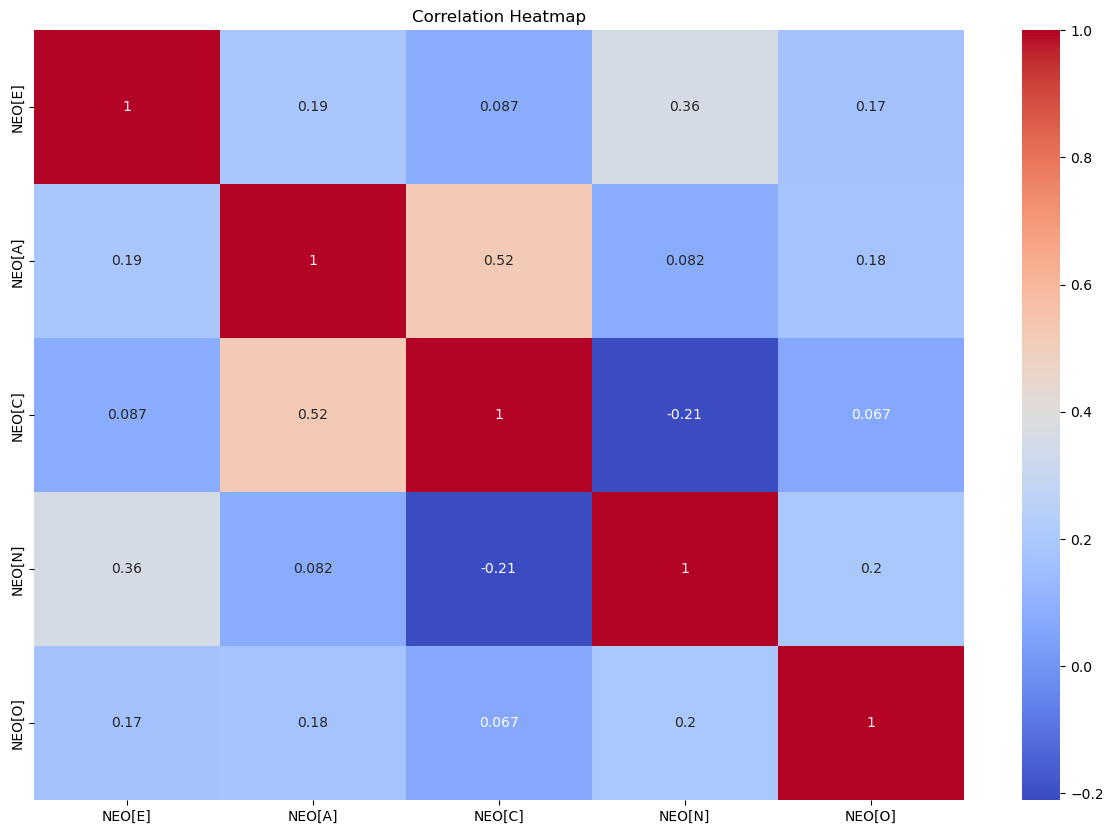

In [50]:
# Correlation Heatmap for Big Five
plt.figure(figsize=(15, 10))
correlation_matrix = data_plot2=data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.02, 'Pairwise Correlations Big Five Personality Traits')

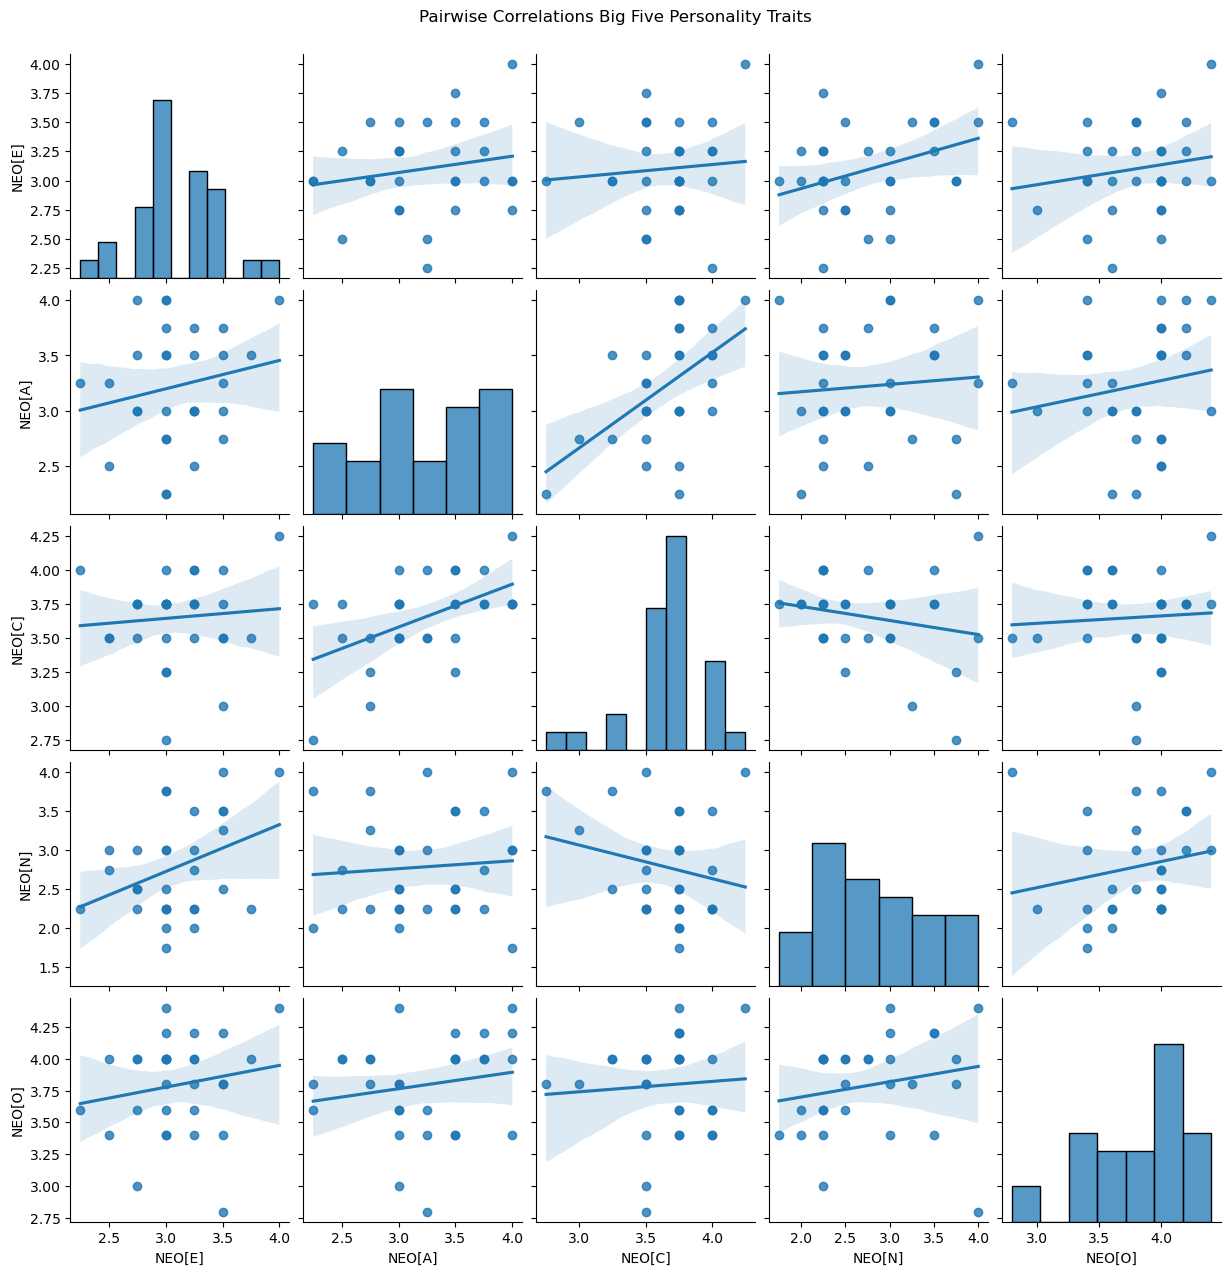

In [52]:
# Look at a pairwise correlation plot for Big Five to see trends
sns.pairplot(data[['NEO[E]', 'NEO[A]', 'NEO[C]', 'NEO[N]', 'NEO[O]']], kind='reg')
plt.suptitle('Pairwise Correlations Big Five Personality Traits', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations JC')

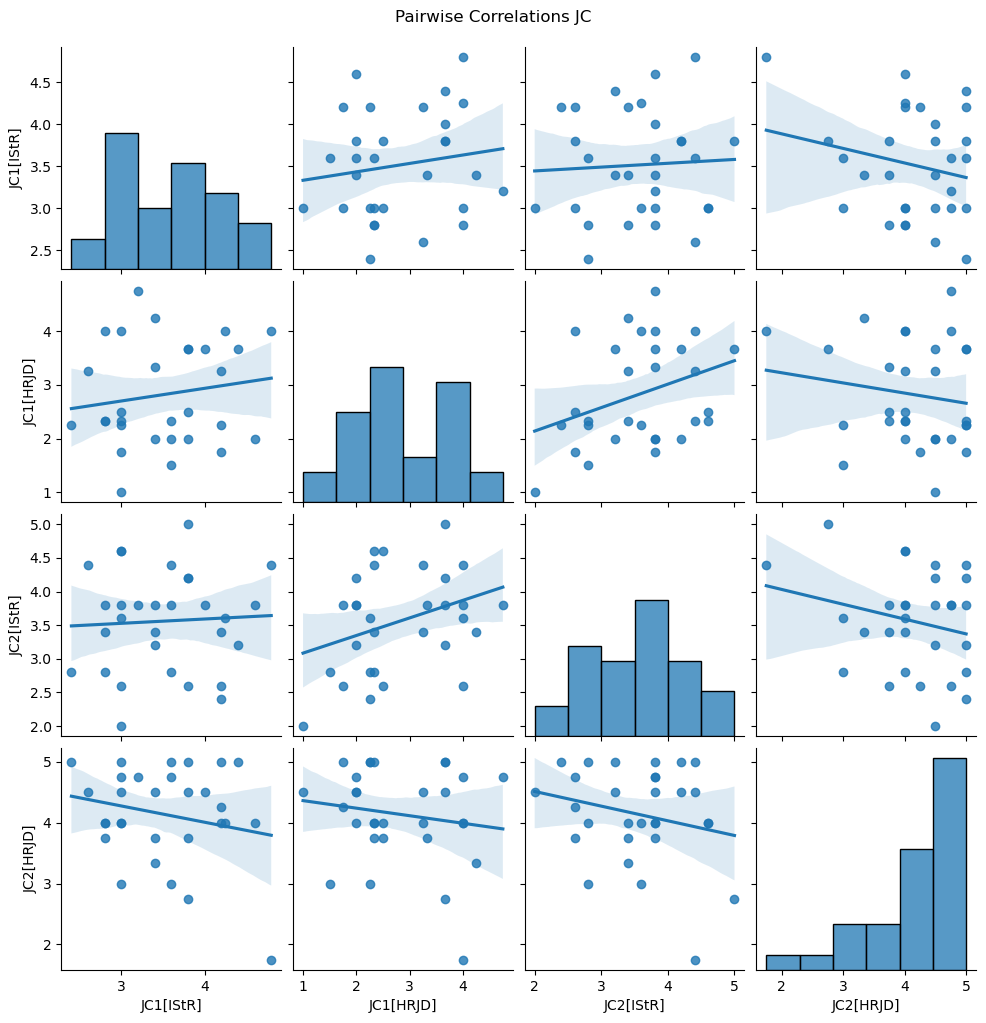

In [53]:
# Look at a pairwise correlation plot for JC to see trends
sns.pairplot(data[['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]']], kind='reg')
plt.suptitle('Pairwise Correlations JC', y=1.02)

Text(0.5, 1.02, 'Pairwise Correlations SDT')

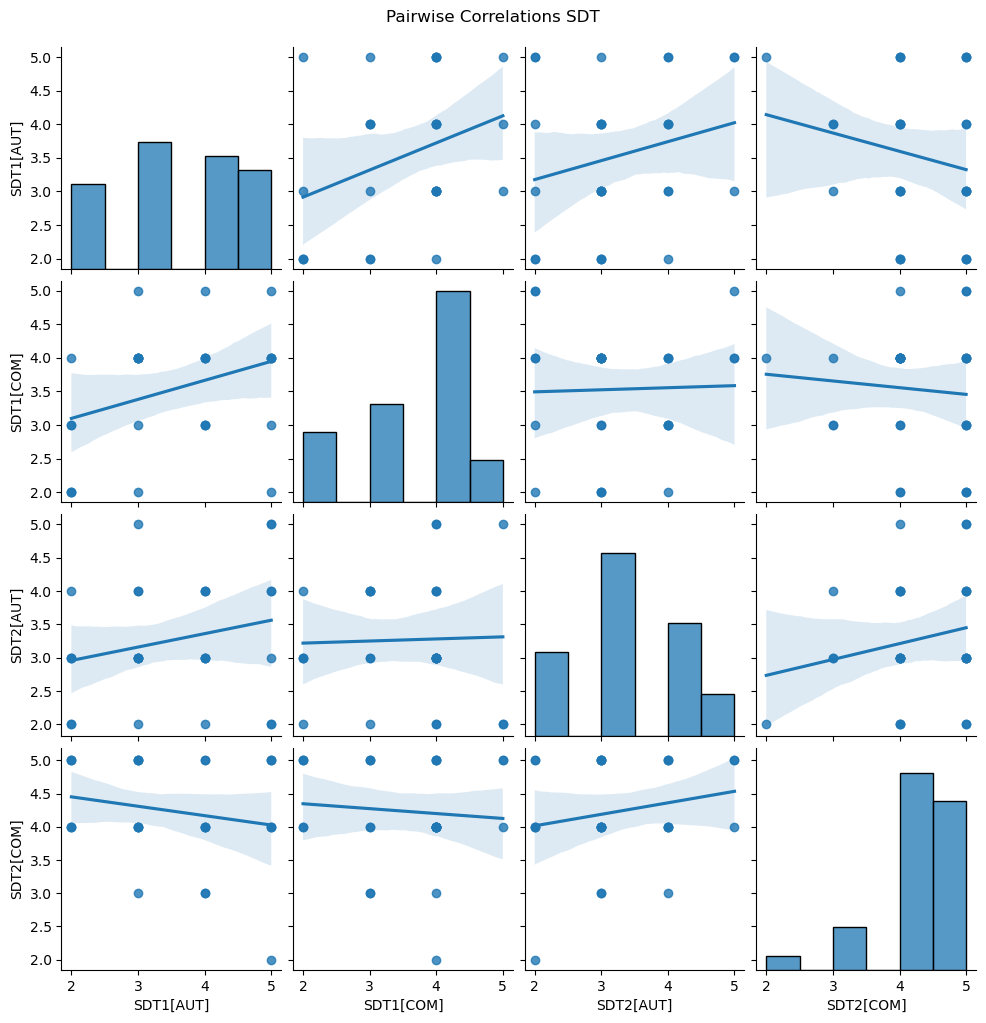

In [54]:
# Look at a pairwise correlation plot for SDT to see trends
sns.pairplot(data[['SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']], kind='reg')
plt.suptitle('Pairwise Correlations SDT', y=1.02)

In [57]:
# Test for normaility with the Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality:")
for column in ['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']:
    stat, p = stats.shapiro(data[column])
    print(f'{column}: Statistics={stat:.3f}, p={p:.3f}')

Shapiro-Wilk Test for Normality:
JC1[IStR]: Statistics=0.964, p=0.383
JC1[HRJD]: Statistics=0.935, p=0.069
JC2[IStR]: Statistics=0.970, p=0.528
JC2[HRJD]: Statistics=0.889, p=0.005
SDT1[AUT]: Statistics=0.873, p=0.002
SDT1[COM]: Statistics=0.847, p=0.001
SDT2[AUT]: Statistics=0.875, p=0.002
SDT2[COM]: Statistics=0.797, p=0.000


In [ ]:
## A significant p-value (<0.05) indicates that the data is not normally distributed. This is the case for most of the variables
## Because parametric tests, i.e. the paired t-test, assume normal distribution it is more approriate to use non-parametric tests
## Therefore, I will also use the Wilcoxon signed-rank test for within-subject comparisons and the Mann-Whitney U test for between-group comparisons

In [60]:
# Calcule skewness and kurtosis for JC and SDT
skewness = data[['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']].skew()
kurtosis = data[['JC1[IStR]', 'JC1[HRJD]', 'JC2[IStR]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT1[COM]', 'SDT2[AUT]', 'SDT2[COM]']].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 JC1[IStR]    0.230923
JC1[HRJD]    0.221496
JC2[IStR]   -0.159313
JC2[HRJD]   -1.168651
SDT1[AUT]   -0.002914
SDT1[COM]   -0.411009
SDT2[AUT]    0.313626
SDT2[COM]   -0.919834
dtype: float64

Kurtosis:
 JC1[IStR]   -0.843175
JC1[HRJD]   -1.036665
JC2[IStR]   -0.641858
JC2[HRJD]    1.647294
SDT1[AUT]   -1.213904
SDT1[COM]   -0.564734
SDT2[AUT]   -0.524952
SDT2[COM]    0.921700
dtype: float64


In [ ]:
## Skewness suggests that most variables have relatively symmetrical distribution
## Kurtosis suggest that most variables have distributions with lighter tails than a normal distribution
## Exception: JC2[HRJD], which has a moderate left skewness and a kurtosis that shows a peaked distribution

### Differences in Group

In [63]:
# Load the data
data = pd.read_csv('data_merged_all.csv')

In [64]:
# Paired t-tests for within-subject comparisons (control vs. experimental)
paired_tests = {
    'Job Crafting Increasing Structural Job Ressources': ['JC1[IStR]', 'JC2[IStR]'],
    'Job Crafting Decreasing Hindering Job Demands': ['JC1[HRJD]', 'JC2[HRJD]'],
    'Self-Determination Autonomy': ['SDT1[AUT]', 'SDT2[AUT]'],
    'Self-Determination Competence': ['SDT1[COM]', 'SDT2[COM]'],
    'Self-Efficacy': ['SE1', 'SE2'],
    'Productivity': ['PROD1', 'PROD2'],
    'Task Difficulty': ['TASKDIF1', 'TASKDIF2']
}

for test, (control, experimental) in paired_tests.items():
    stat, p = ttest_rel(data[control], data[experimental])
    print(f"{test} Control vs. Experimental: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources Control vs. Experimental: t=-0.259, p=0.797
Job Crafting Decreasing Hindering Job Demands Control vs. Experimental: t=-5.417, p=0.000
Self-Determination Autonomy Control vs. Experimental: t=1.188, p=0.245
Self-Determination Competence Control vs. Experimental: t=-3.102, p=0.004
Self-Efficacy Control vs. Experimental: t=7.186, p=0.000
Productivity Control vs. Experimental: t=-0.392, p=0.698
Task Difficulty Control vs. Experimental: t=-2.475, p=0.019


In [67]:
## Significant differences in HDR, COMP, SE, and TASDIF. 
## No significanct difference for IStR, AUT, PROD
## BUT: t-value for HDR and COM is neg, which means that HDR and COMP levels where higher in control 
# => There must be an error somewhere because graphically and by looking at the means we can clearly see that the contrary is the case 

In [65]:
# Independent t-tests for between-subject comparisons ((with vs. without prompt support in experimental conditions) based on 'Prompt_Support'
# Split  dataset based on binary condition
data_with_support = data[data['Prompt_Support'] == 1]
data_without_support = data[data['Prompt_Support'] == 0]

# Independent t-tests for between-subjects (experimental I vs II))
independent_tests = {
    'Job Crafting Increasing Structural Job Ressources': 'JC2[IStR]',
    'Job Crafting Decreasing Hindering Job Demands': 'JC2[HRJD]',
    'Self-Determination Autonomy': 'SDT2[AUT]',
    'Self-Determination Competence': 'SDT2[COM]',
    'Self-Efficacy': 'SE2',
    'Productivity': 'PROD2',
    'Task Difficulty': 'TASKDIF2'
}

for test, column in independent_tests.items():
    stat, p = ttest_ind(data_with_support[column], data_without_support[column])
    print(f"{test} With vs. Without Prompt Support: t={stat:.3f}, p={p:.3f}")

Job Crafting Increasing Structural Job Ressources With vs. Without Prompt Support: t=-0.464, p=0.646
Job Crafting Decreasing Hindering Job Demands With vs. Without Prompt Support: t=0.970, p=0.341
Self-Determination Autonomy With vs. Without Prompt Support: t=0.291, p=0.773
Self-Determination Competence With vs. Without Prompt Support: t=-0.815, p=0.422
Self-Efficacy With vs. Without Prompt Support: t=-0.348, p=0.730
Productivity With vs. Without Prompt Support: t=1.792, p=0.084
Task Difficulty With vs. Without Prompt Support: t=-0.187, p=0.853


In [ ]:
## No statistical significant differences between participants who had prompt support and those who didn't 

In [72]:
# Compare job crafting constructs between conditions using Wilcoxon signed-rank test to improve robustness
# List of variables for comparisons
pair_variables = ['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']

# Wilcoxon Signed-Rank Test 
print("Within-Subject Comparisons (Control vs. Experimental):")
for i in range(0, len(variables), 2):
    stat, p = stats.wilcoxon(data[variables[i]], data[variables[i+1]], zero_method='wilcox', correction=True)
    print(f"{variables[i]} vs. {variables[i+1]}: W={stat}, p={p}")

Within-Subject Comparisons (Control vs. Experimental):
JC1[IStR] vs. JC2[IStR]: W=192.5, p=0.819776534085314
JC1[HRJD] vs. JC2[HRJD]: W=31.0, p=0.00015293161347423916
SDT1[AUT] vs. SDT2[AUT]: W=61.5, p=0.28846890989865814
SDT1[COM] vs. SDT2[COM]: W=20.5, p=0.0075013113044935355


c:\Users\franc\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [ ]:
## Though probably more robust, the findings don't change

In [73]:
# Function to remove outliers based on Z-score
def remove_outliers(data, column_list):
    for column in column_list:
        data[column] = data[column].astype(float)  # Ensure the data is float
        z_scores = stats.zscore(data[column])
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores < 3)  # Keeping only rows with a Z-score < 3
        data = data[filtered_entries]
    return data

# Columns to check for outliers
columns_to_check = ['JC1[IStR]', 'JC2[IStR]', 'JC1[HRJD]', 'JC2[HRJD]', 'SDT1[AUT]', 'SDT2[AUT]', 'SDT1[COM]', 'SDT2[COM]']

# Remove outliers
data_clean = remove_outliers(data, columns_to_check)

In [74]:
# Wilcoxon Signed-Rank Test without outliers
print("Within-Subject Comparisons (Control vs. Experimental):")
for i in range(0, len(variables), 2):
    stat, p = stats.wilcoxon(data_clean[variables[i]], data_clean[variables[i+1]], zero_method='wilcox', correction=True)
    print(f"{variables[i]} vs. {variables[i+1]}: W={stat}, p={p}")

Within-Subject Comparisons (Control vs. Experimental):
JC1[IStR] vs. JC2[IStR]: W=178.5, p=0.8100288734329057
JC1[HRJD] vs. JC2[HRJD]: W=13.0, p=3.833449761119593e-05
SDT1[AUT] vs. SDT2[AUT]: W=61.5, p=0.47352230136624995
SDT1[COM] vs. SDT2[COM]: W=9.0, p=0.0020624996407053197


c:\Users\franc\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [ ]:
## No changes in significances

In [78]:
# Compare job crafting constructs between conditions using Mann-Whitney U test to improve robustness
# Filtering groups based on 'Prompt_Support'
group_no_support = data[data['Prompt_Support'] == 0]
group_with_support = data[data['Prompt_Support'] == 1]

# Variables for comparisons (experimental condition I vs. II)
between_variables = ['JC2[IStR]','JC2[HRJD]', 'SDT2[AUT]', 'SDT2[COM]']

# Mann-Whitney U test
print("\nExperimental I vs. II:")
for variable in between_variables:
    stat, p = stats.mannwhitneyu(group_no_support[variable], group_with_support[variable])
    print(f"{variable}: U={stat}, p={p}")



Experimental I vs. II:
JC2[IStR]: U=124.5, p=0.6148813081004528
JC2[HRJD]: U=85.0, p=0.2641545732103605
SDT2[AUT]: U=106.5, p=0.8257787810733693
SDT2[COM]: U=121.0, p=0.6988598029112378


In [ ]:
## Though probably more robust, the findings don't change

### Validation